## Домашнее задание №1 по курсу "Машинное обучение"

## Константинов Вячеслав

### Вопрос 1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

### Ответ

Рассмотрим два типа событий: $A$ = {невиновен}, $B$ = {обладает редкой группой крови}. Прокурор в своей речи оценивает условную вероятность $P(B|A)$, а необходимо оценить $P(A|B)$, которая, если учитывать как доказательство только и только кровь, будет равна:

$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} = \frac{ \frac{9999}{100000} \cdot \frac{999999}{1000000} }{\frac{10000}{1000000}} = \frac{9999}{10000} \cdot \frac{999999}{1000000}$$

Таким образом, при использовании в качестве доказательства только редкой группы крови приводит к тому, что вероятность невиновности близок к 1 и отличается от вероятности, что произвольно выбранный челоек из города - убийца, лишь на множитель, который также очень близок к 1. Чтобы улучшить оценку, прокурору следует использовать кровь вместе с другими доказательствами, что изменить априорные оценки вероятностей в теореме Байеса, то есть, то что подсудимый находился рядом с местом происшествия или был знаком с жертвой.

### Вопрос 2

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. 

Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

### Ответ

Обозначим через отрицание $A$ события $C$ = {виновен}. Тогда адвокат формально верно воспользовался теоремой Байеса, если учитывать как доказательство только кровь:

$$ P(C|B) = \frac{P(B|C) \cdot P(C)}{P(B)} = \frac{1 \cdot \frac{1}{1000000} }{ \frac{10000}{1000000}} = \dfrac{1}{10000}$$

Однако, если бы адвокат также учёл бы и другие доказательства, свидетельствующие против подсудимого, то априорные вероятности и оценка $P(C|B)$ изменились бы не в пользу подсудимого.

### Вопрос 3

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

### Ответ

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Обозначим следующие собития Sick = {"Пациент болен"}, Pos = {"Тест дал положительный результат"}, Neg = {"Тест дал отрицательный результат"}, $\alpha_1$,$\alpha_2$ - вероятности ошибок первого рода (ложноположительных) и второго рода (ложноотрицательных), $q$ - доля заболевшего населения.

Вероятность корректного положительного результата

$$P_{good} = P(Sick|Pos) = \frac{P(Pos|Sick) \cdot P(Sick)}{P(Pos)} = \frac{(1 - \alpha_1) q}{(1 - \alpha_1) q + \alpha_1  (1 - q)}$$

Вероятность некорректного отрицательного результата

$$P_{bad} = P(Sick|Neg) = \frac{P(Neg|Sick) \cdot P(Sick)}{P(Neg)} = \frac{\alpha_2 q}{(1 - \alpha_2)(1 - q) + \alpha_2 q}  $$

In [2]:
# q - доля населения с коронавирусом

#вероятность того, что пациент заболел, если тест положителен
# alpha_1 - вероятность ложноположительного теста = ошибка первого рода
def P_good(alpha_1, q=0.01):
    return (1 - alpha_1) * q / ((1 - alpha_1)*q + alpha_1*(1 - q))

#вероятность того, что пациент заболел, если тест отрицателен
# alpha_2 - вероятность ложноотрицательного теста = ошибка второго рода
def P_bad(alpha_2, q=0.01):
    return alpha_2 * q / ((1 - alpha_2)*(1 - q) + alpha_2*q)

In [3]:
alpha = np.linspace(.0, 1., num=101)

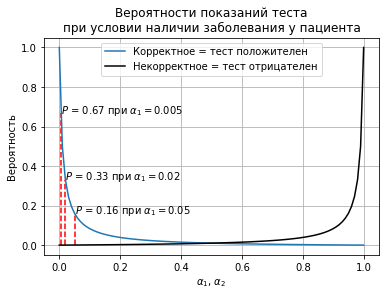

In [4]:
plt.plot(alpha, P_good(alpha, q=0.01), label="Корректное = тест положителен")
plt.plot(alpha, P_bad (alpha, q=0.01), label="Некорректное = тест отрицателен", c='black')

plt.title("Вероятности показаний теста\nпри условии наличии заболевания у пациента")
plt.xlabel(r"$\alpha_1$, $\alpha_2$")
plt.ylabel("Вероятность")

plt.vlines(0.05, 0, P_good(0.05, q=0.01), colors='red', linestyles='dashed')
plt.vlines(0.02, 0, P_good(0.02, q=0.01), colors='red', linestyles='dashed')
plt.vlines(0.005, 0, P_good(0.005, q=0.01), colors='red', linestyles='dashed')

plt.text(0.05, P_good(0.05, q=0.01), f"$P$ = {round(P_good(0.05, q=0.01), 2)} при " + r"$\alpha_1=0.05$")
plt.text(0.02, P_good(0.02, q=0.01), f"$P$ = {round(P_good(0.02, q=0.01), 2)} при " + r"$\alpha_1=0.02$")
plt.text(0.005, P_good(0.005, q=0.01), f"$P$ = {round(P_good(0.005, q=0.01), 2)} при " + r"$\alpha_1=0.005$")

plt.legend()
plt.grid()
plt.show()

In [5]:
P_good(0.05, 0.01)

0.16101694915254236

In [6]:
P_bad(0.05, 0.01)

0.0005313496280552604

По своей сути ошибка второго рода, т.е. ложноотрицательный тест, гораздо опаснее ложноположительного. Однако в условиях задачи вероятность того, что тест покажет отрицательный результ в случае, если пациент болен, не будет превышать 1% даже при высокой ошибке второго рода, в то время, как уменьшение ошибки ложноположительного теста даёт существенный рост корректности предсказания, когда пациент действительно болен. Таким образом, для более точного выявления больных разумнее было бы сосредоточиться на уменьшении ошибок первого рода.